In [155]:
ls ./data-files

CardioGoodFitness-1.csv    auto-mpg.csv
HR_comma_sep.csv           titanic-training-data.csv


In [156]:
# import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [157]:
df = pd.read_csv('./data-files/HR_comma_sep.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [158]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [159]:
df.shape

(14999, 10)

In [160]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Creating subset of data where Department is sales

In [161]:
dept_sales = df[df['Department'].isin(['sales'])]
print(dept_sales.shape)
dept_sales.head()

(4140, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Analyzing the Data

<AxesSubplot:xlabel='left', ylabel='count'>

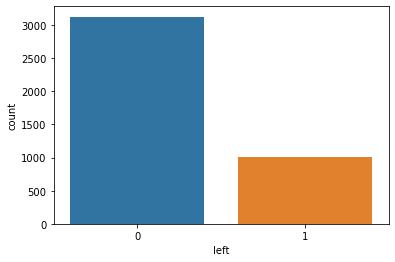

In [162]:
sns.countplot(x='left', data=dept_sales)

<AxesSubplot:xlabel='left', ylabel='count'>

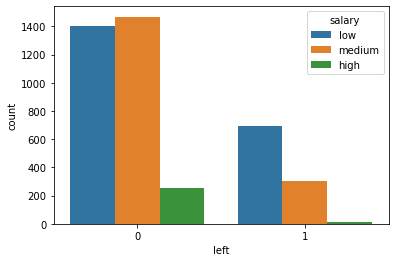

In [163]:
sns.countplot(x='left', hue='salary', data=dept_sales)

<AxesSubplot:xlabel='left', ylabel='count'>

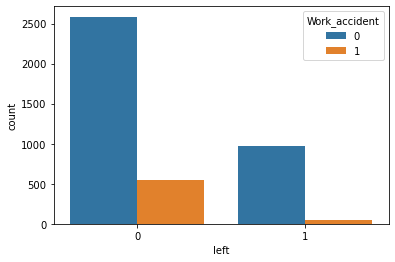

In [164]:
sns.countplot(x='left', hue='Work_accident', data=dept_sales)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

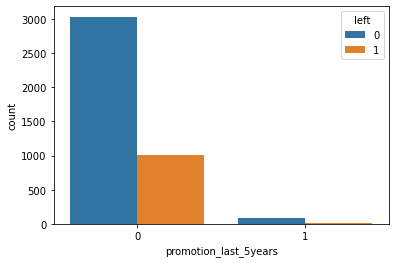

In [165]:
sns.countplot(x='promotion_last_5years', hue='left', data=dept_sales)

#### Data Wrangling

In [166]:
dept_sales.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:>

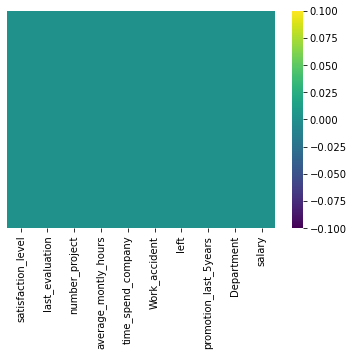

In [167]:
sns.heatmap(dept_sales.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

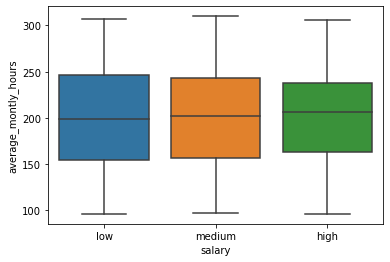

In [168]:
sns.boxplot(x='salary', y='average_montly_hours', data=dept_sales)

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

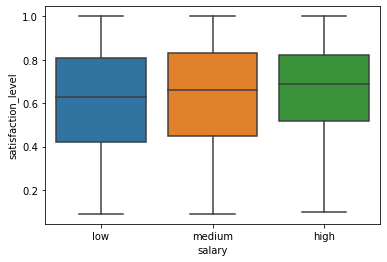

In [169]:
sns.boxplot(x='salary', y='satisfaction_level', data=dept_sales)

In [170]:
dept_sales.drop('Department', axis=1, inplace=True)
dept_sales.head()

/Users/agurbaxani/opt/anaconda3/envs/spyder505/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [171]:
dept_sales.shape

(4140, 9)

In [172]:
salary = pd.get_dummies(dept_sales['salary'], drop_first=True)
salary.head()

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [173]:
dept_sales = pd.concat([dept_sales,salary], axis = 1)
dept_sales.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,low,1,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,low,1,0
4,0.37,0.52,2,159,3,0,1,0,low,1,0


In [174]:
dept_sales.drop('salary', axis = 1, inplace=True)
dept_sales.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


#### Split the Data

In [175]:
x = dept_sales.drop('left', axis = 1)
y = dept_sales['left']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.32, random_state = 42)
#print(x_train, x_test, y_train, y_test)

In [177]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/agurbaxani/opt/anaconda3/envs/spyder505/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [178]:
predictions = model.predict(x_test)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8022641509433962

In [180]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       984
           1       0.71      0.39      0.50       341

    accuracy                           0.80      1325
   macro avg       0.76      0.67      0.69      1325
weighted avg       0.79      0.80      0.78      1325



In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[930,  54],
       [208, 133]])

In [182]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
df_cm

,Predict 1,Predict 0
1,930,54
0,208,133


<AxesSubplot:>

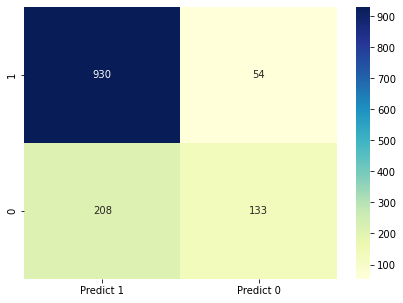

In [183]:
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap='YlGnBu')